In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [7]:
import random as ran
from IPython.display import clear_output
from src import spotify, dp, utils, DB
import pandas as pd
import math as mt

db = DB()

# K Checking
- 새로운 K의 갯수를 만들 수 있는지 확인하는 과정

In [10]:
seed_musics = db.seed_zone.estimated_document_count()
K = round(mt.sqrt(seed_musics / 2))
print("현재 seed 음악 갯수 : {}".format(seed_musics))
print("K 갯수 : {}".format(K))

현재 seed 음악 갯수 : 131
K 갯수 : 8


In [21]:
_seed_features = db.seed_zone.find({})
seed_features = pd.DataFrame([_ for _ in _seed_features])

seed_features.drop(["_id"], axis=1, inplace=True)
seed_features.rename({"track_id": "id"}, axis=1,inplace=True)

seed_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3UPjb91Fwm7u2tAm92Bk0p,0.554,0.5260,7,-5.210,0.0394,0.8080,0.000000,0.0740,0.230,129.845
1,3gzIK2dGSVvPBiohsTwEWZ,0.639,0.5690,0,-7.236,0.0487,0.0581,0.000169,0.1080,0.616,142.967
2,7tIOwGFRTM08JdAeKOELGp,0.632,0.0378,5,-20.596,0.0583,0.9890,0.935000,0.1120,0.357,121.361
3,2FWquqPNxte8iqZ3ATQG0p,0.403,0.7240,8,-6.064,0.2460,0.3770,0.000000,0.0927,0.428,97.133
4,3dbLT62Cvs46Ju7a8gpr36,0.727,0.8790,9,-1.167,0.1290,0.1240,0.000012,0.2440,0.671,146.959


# Make Norm Features

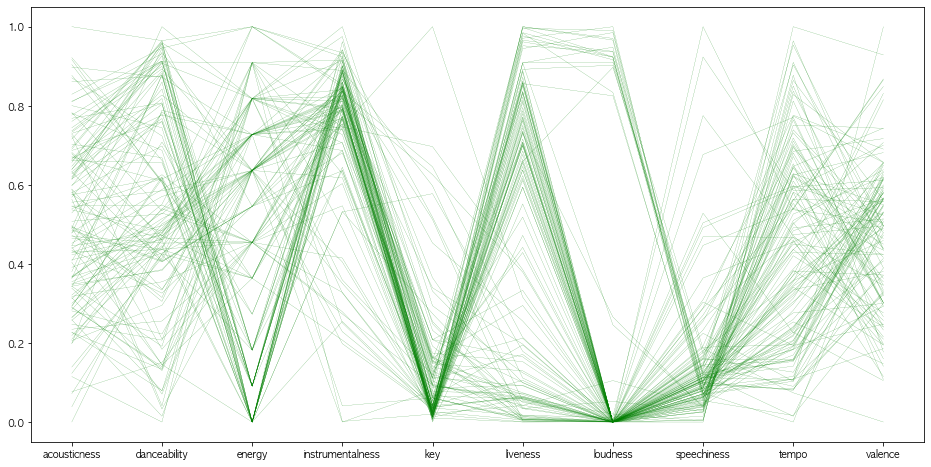

In [26]:
norm_features = dp.make_norm(seed_features)

utils.visual_norm_data(None, norm_features)

In [25]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)

1 round : ECV 37.64%
2 round : ECV 63.69%
3 round : ECV 72.8%
4 round : ECV 75.66%
5 round : ECV 76.22%
6 round : ECV 77.18%
7 round : ECV 77.48%
8 round : ECV 77.49%
9 round : ECV 77.49%
10 round : ECV 77.49%
11 round : ECV 77.49%
12 round : ECV 77.49%
13 round : ECV 77.49%
14 round : ECV 77.49%
Clustering End.


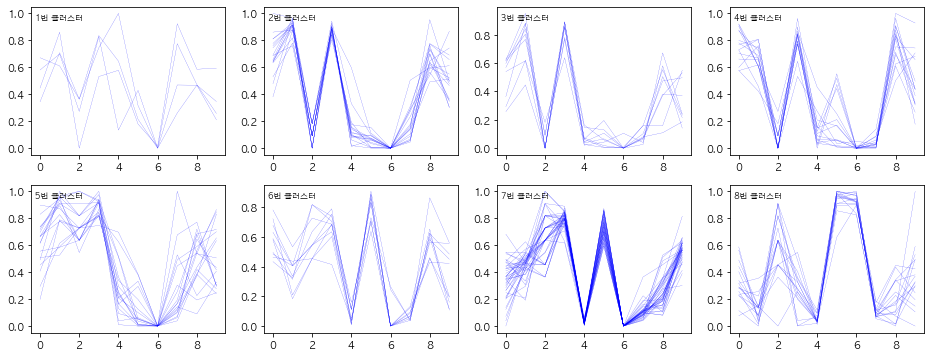

In [27]:
utils.visual_cluster_data(norm_features, kmeans)